In [88]:
import urllib.request
import cv2, os, glob
import numpy as np
from keras.models import load_model
from Subpixel import Subpixel
from skimage.transform import pyramid_reduce
from skimage.transform import pyramid_expand
import matplotlib.pyplot as plt
from Modimg import ModImg

In [72]:
model = load_model('models/model_256.h5', custom_objects={'Subpixel':Subpixel})

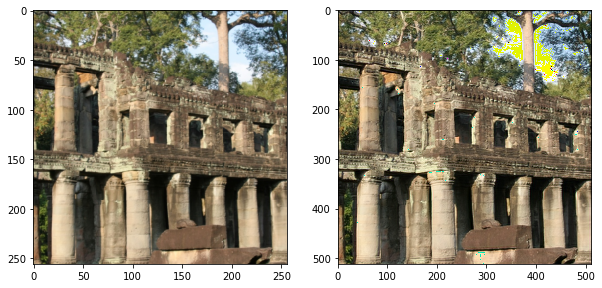

In [94]:
# x1_test = cv2.imread('celeba-dataset\\dataset-image-super-resolution\\train\\hires\\dt_train_555.jpg')
x1_test = cv2.imread('celeba-dataset\\train_f\\train_f\\f352743cdf535690.jpg')
img = ModImg(x1_test, 512, 2)
padded = img.getPadImg()
x1_test_resized = pyramid_reduce(padded, 2)
y_pred = model.predict(x1_test_resized.reshape((1, 256, 256, 3)))
y_pred = y_pred.reshape((512, 512, 3))

x1_test_resized = (x1_test_resized * 255).astype(np.uint8)
cv2.imwrite('before.jpg', x1_test_resized)
x1_test_resized = cv2.cvtColor(x1_test_resized, cv2.COLOR_BGR2RGB)
y_pred = (y_pred * 255).astype('uint8')
cv2.imwrite('processed.jpg', y_pred)
y_pred = cv2.cvtColor(y_pred, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(x1_test_resized)
plt.subplot(1, 2, 2)
plt.imshow(y_pred)
